In [739]:
#importing all the libraries at one place so that it would not raise any errors if we run any cell

import numpy as np
import pandas as pd

#suppress warnings
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm

In [740]:
#import dataset
cars = pd.read_csv("CarPrice_Assignment.csv")

In [741]:
#get the datatypes information
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [742]:
# check data in columns
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [743]:
#check for null values
cars.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [744]:
cars.head() # check the data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [745]:
cars.nunique() #check for the unique items to get some picture about categorical and non categorical variables

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [746]:
#deleting car_Id as it would not add any information in analysis
#and as there ar many comuns it would be better to go with lee number of columns
cars=cars.drop('car_ID',axis=1)

In [729]:
cars

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


## Data Visualization


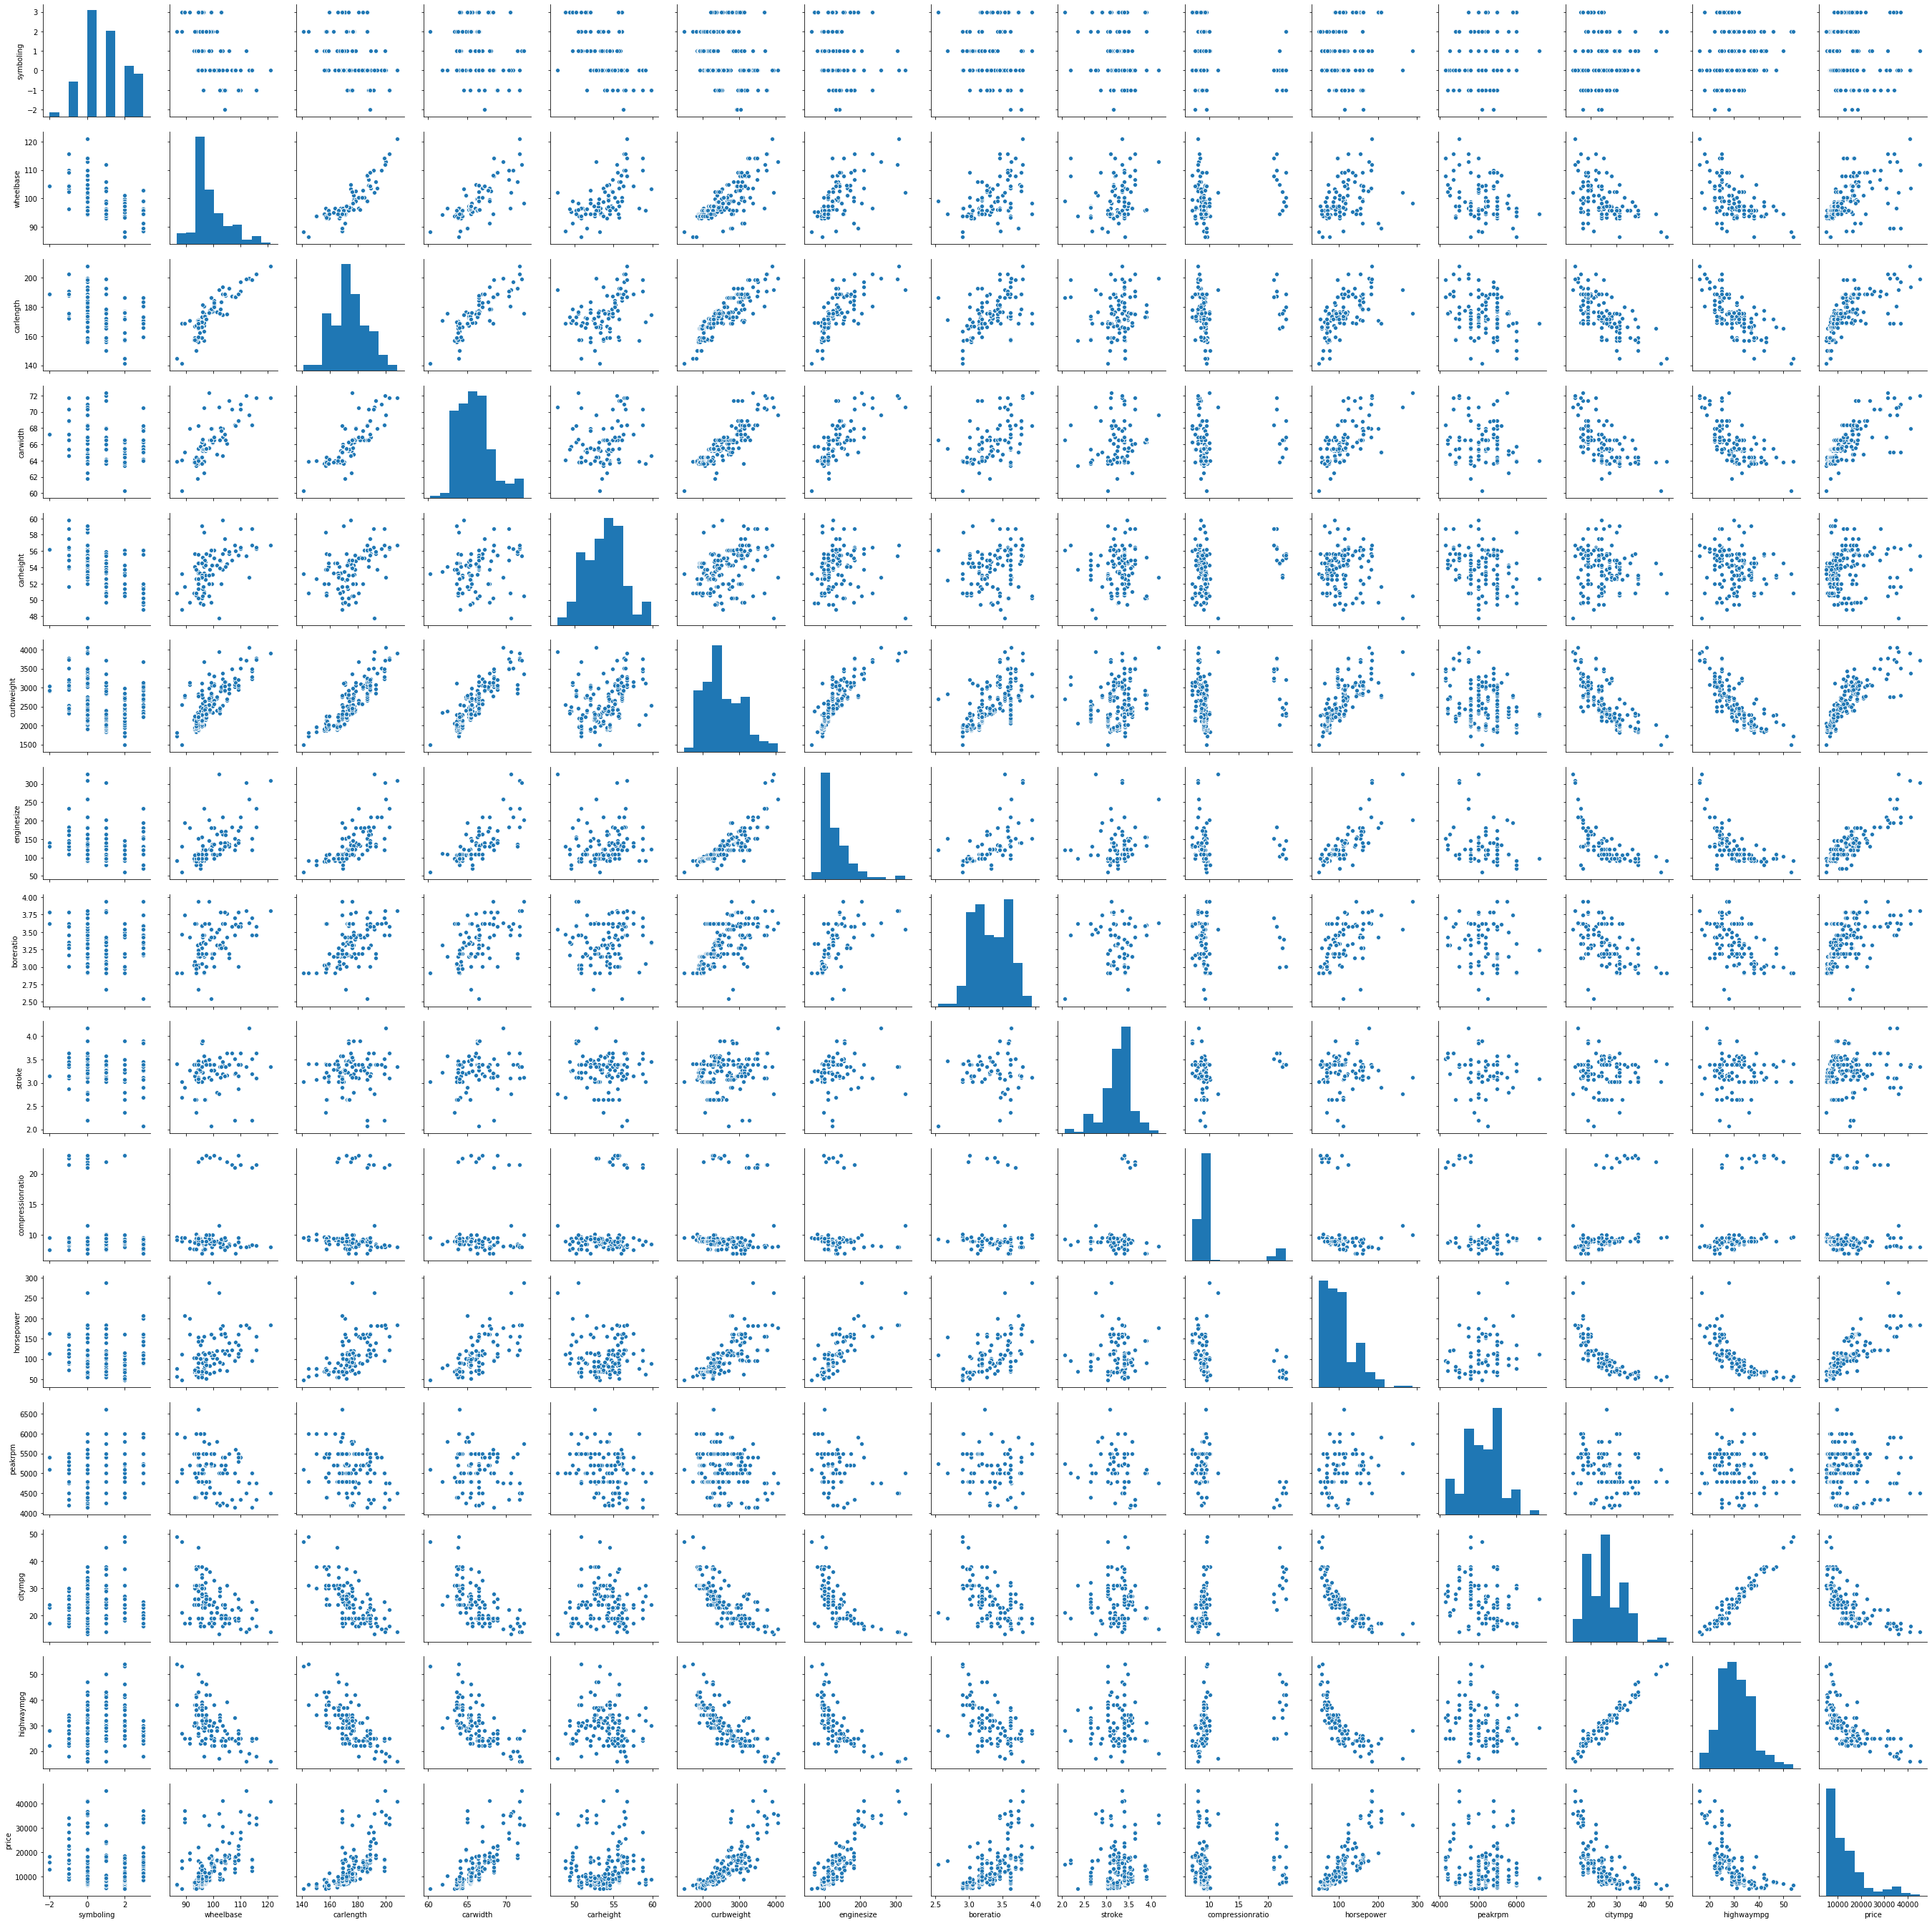

In [730]:
#visualization to show non-categorical variables
sns.pairplot(cars)
plt.show()

### As we can see there are many columns which have strong correlation with price column and strong correlation between dependent columns


In [747]:
#getting the brand name by splitting carName 
cars['brand'] = cars['CarName'].str.split(" ",expand=True)[0]

In [748]:
#There are some brand names which are miss spelt or mentioned in short forms like 'vw' 
#converting them to single column as there are many columns

cars["brand"].replace({"vokswagen": "volkswagen"}, inplace=True)
cars["brand"].replace({"maxda": "mazda"}, inplace=True)
cars["brand"].replace({"vw": "volkswagen"}, inplace=True)
cars["brand"].replace({"porcshce": "porsche"}, inplace=True)
cars["brand"].replace({"toyouta": "toyota"}, inplace=True)

In [749]:
cars.corr()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984


In [734]:
#Columns which are strongly related and weakly related
#enginesize,curbweight,horsepower,carwidth have the highest correlation
#carheight,stroke,compressionration,peakrpm have least correlation
#one point to consider is engine size and curb weight are very strongly correlated

In [735]:
cars.nunique()

symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
brand                23
dtype: int64

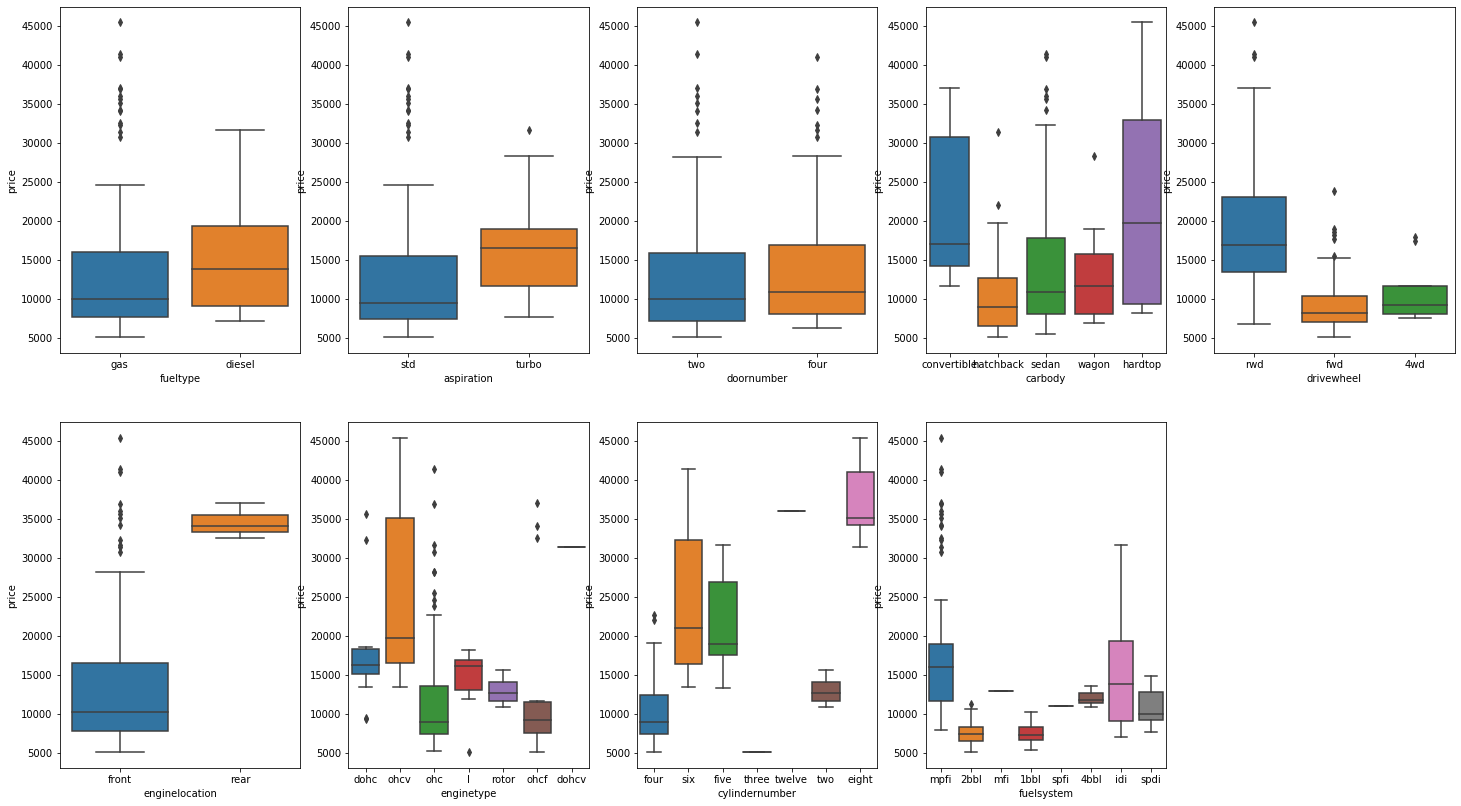

In [736]:
#Visualization to show categorical variables
plt.figure(figsize=(25, 14))
plt.subplot(2,5,1)
sns.boxplot(x = 'fueltype', y = 'price', data = cars)
plt.subplot(2,5,2)
sns.boxplot(x = 'aspiration', y = 'price', data = cars)
plt.subplot(2,5,3)
sns.boxplot(x = 'doornumber', y = 'price', data = cars)
plt.subplot(2,5,4)
sns.boxplot(x = 'carbody', y = 'price', data = cars)
plt.subplot(2,5,5)
sns.boxplot(x = 'drivewheel', y = 'price', data = cars)
plt.subplot(2,5,6)
sns.boxplot(x = 'enginelocation', y = 'price', data = cars)
plt.subplot(2,5,7)
sns.boxplot(x = 'enginetype', y = 'price', data = cars)
plt.subplot(2,5,8)
sns.boxplot(x = 'cylindernumber', y = 'price', data = cars)
plt.subplot(2,5,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = cars)

plt.show()

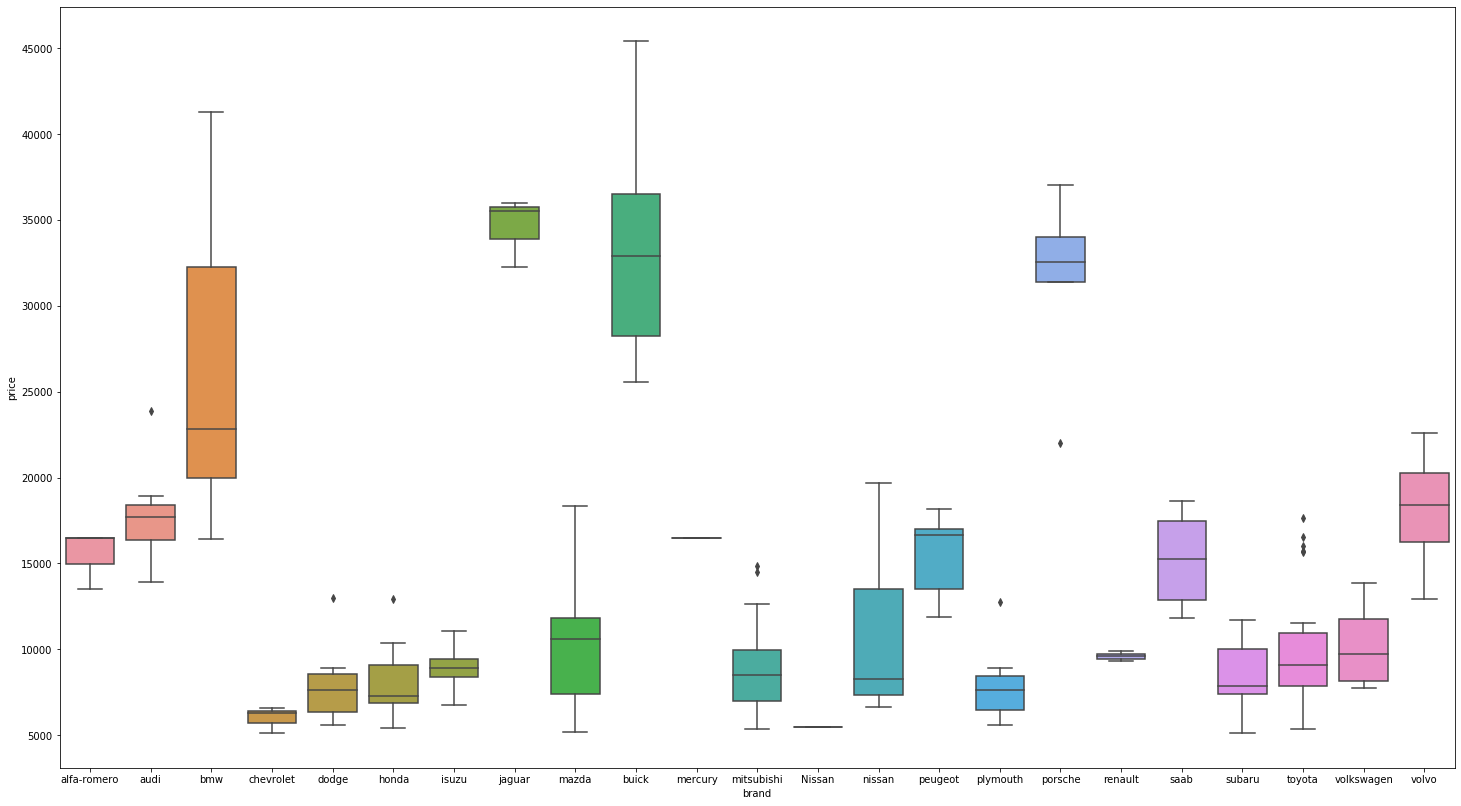

In [738]:
plt.figure(figsize=(25, 14))
sns.boxplot(x = 'brand', y = 'price', data = cars)
plt.show()

### As we can see the brand name influences the price the price of a certain brand ranges in certain way. 

## we need to convert many categorical variables present to get the correlation.
## there are variables which have only two values and some with 5-6 categories

In [750]:
##converting variables whic have only 2 values in categorical variables to 0s and 1
cars['fueltype'] = cars['fueltype'].map({'gas': 1, "diesel": 0})
cars['aspiration'] = cars['aspiration'].map({'std': 1, "turbo": 0})
cars['doornumber'] = cars['doornumber'].map({'two': 1, "four": 0})
cars['enginelocation'] = cars['enginelocation'].map({'front': 1, "rear": 0})

In [751]:
#dropping carname variable as brand name is already extracted
cars=cars.drop('CarName',axis=1)

In [752]:
#create dummies for categrical variables 
#carbody
carbody_dummies = pd.get_dummies(cars['carbody'])
#removing convertible as n-1 dummies suffice
carbody_dummies=carbody_dummies.drop('convertible',axis=1)
cars = pd.concat([cars, carbody_dummies], axis = 1)
cars = cars.drop('carbody',axis=1)

In [753]:
#2.drivewheel
drivewheel_dummies = pd.get_dummies(cars['drivewheel'])
#drivewheel_dummies
drivewheel_dummies=drivewheel_dummies.drop('4wd',axis=1)
cars = pd.concat([cars, drivewheel_dummies], axis = 1)
cars = cars.drop('drivewheel',axis=1)

In [754]:
#3.enginetype
enginetype_dummies = pd.get_dummies(cars['enginetype'])
#enginetype_dummies
enginetype_dummies=enginetype_dummies.drop('dohc',axis=1)
cars = pd.concat([cars, enginetype_dummies], axis = 1)
cars = cars.drop('enginetype',axis=1)

In [755]:
#4.cylindernumber
cylindernumber_dummies = pd.get_dummies(cars['cylindernumber'])
#cylindernumber_dummies
cylindernumber_dummies=cylindernumber_dummies.drop('four',axis=1)
cars = pd.concat([cars, cylindernumber_dummies], axis = 1)
cars = cars.drop('cylindernumber',axis=1)

In [756]:
#5.fuelsystem
fuelsystem_dummies = pd.get_dummies(cars['fuelsystem'])
#fuelsystem_dummies
fuelsystem_dummies=fuelsystem_dummies.drop('mpfi',axis=1)
cars = pd.concat([cars, fuelsystem_dummies], axis = 1)
cars = cars.drop('fuelsystem',axis=1)

In [757]:
#6.brand
brand_dummies = pd.get_dummies(cars['brand'])
#brand_dummies
brand_dummies=brand_dummies.drop('alfa-romero',axis=1)
cars = pd.concat([cars, brand_dummies], axis = 1)
cars = cars.drop('brand',axis=1)

In [758]:
#Checking the data again
cars.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,eight,five,six,three,twelve,two,1bbl,2bbl,4bbl,idi,mfi,spdi,spfi,Nissan,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,3,1,1,1,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,1,1,1,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,1,1,0,1,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,1,1,0,1,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


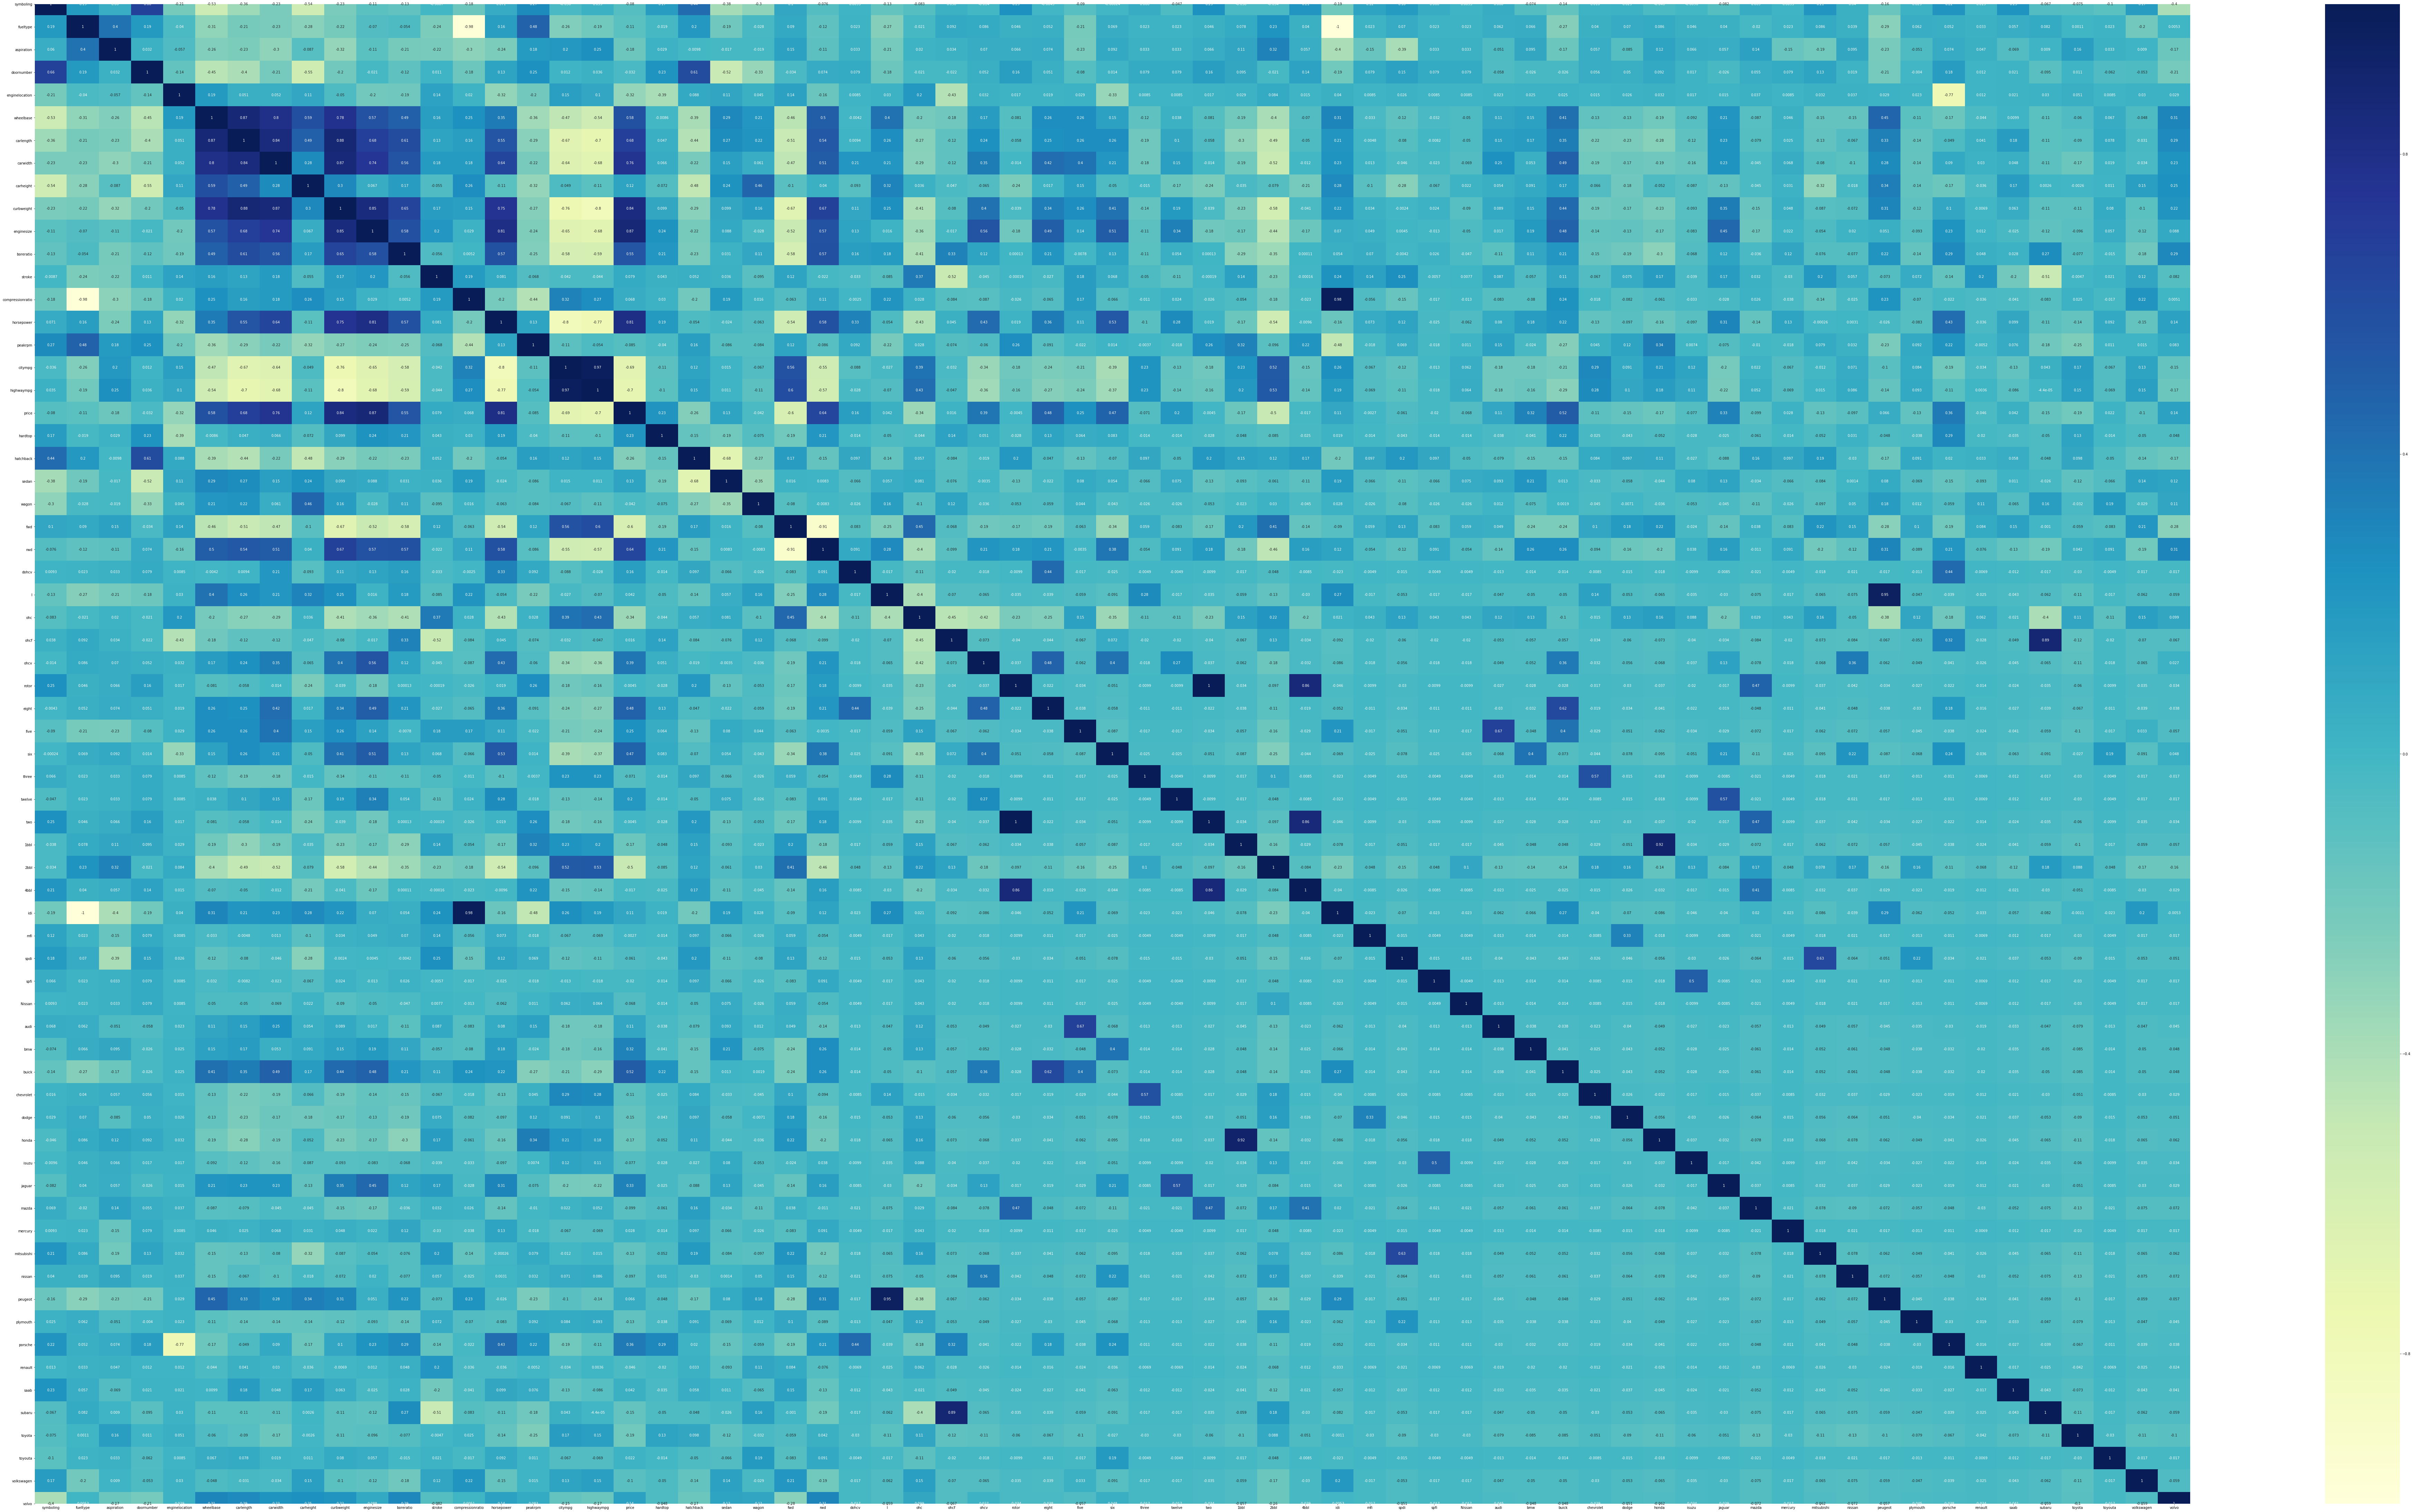

In [629]:
plt.figure(figsize = (140, 80))
sns.heatmap(cars.corr(), annot = True, cmap="YlGnBu")
plt.show()

### As we can see that the figure is not clear because there are many columns

In [630]:
cars.corr()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,eight,five,six,three,twelve,two,1bbl,2bbl,4bbl,idi,mfi,spdi,spfi,Nissan,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,toyouta,volkswagen,volvo
symboling,1.000000,0.194311,0.059866,0.664073,-0.212471,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978,0.168845,0.435648,-0.378341,-0.298243,0.102839,-0.076381,0.009347,-0.133979,-0.082855,0.037513,-0.013597,0.245950,-0.004346,-0.090188,-0.000238,0.065707,-0.047012,0.245950,-0.037911,-0.034069,0.212471,-0.194311,0.122067,0.181939,0.065707,0.009347,0.068348,-0.074482,-0.135313,0.016270,0.028609,-0.045822,-0.009555,-0.081830,0.068625,0.009347,0.211978,0.040147,-0.159891,0.025103,0.224755,0.013252,0.232847,-0.067071,-0.075173,-0.103372,0.167106,-0.403849
fueltype,0.194311,1.000000,0.401397,0.191491,-0.040070,-0.308346,-0.212679,-0.233880,-0.284631,-0.217275,-0.069594,-0.054451,-0.241829,-0.984356,0.163926,0.476883,-0.255963,-0.191392,-0.105679,-0.018635,0.202093,-0.185623,-0.028183,0.090342,-0.122035,0.023020,-0.268163,-0.020584,0.092384,0.085556,0.046383,0.051988,-0.213527,0.068594,0.023020,0.023020,0.046383,0.078293,0.226565,0.040070,-1.000000,0.023020,0.070457,0.023020,0.023020,0.061822,0.066258,-0.273316,0.040070,0.070457,0.085556,0.046383,0.040070,-0.020356,0.023020,0.085556,0.039258,-0.286482,0.061822,0.051988,0.032636,0.057092,0.081986,0.001119,0.023020,-0.198133,0.005338
aspiration,0.059866,0.401397,1.000000,0.031792,-0.057191,-0.257611,-0.234539,-0.300567,-0.087311,-0.324902,-0.108217,-0.212614,-0.222982,-0.295541,-0.241685,0.183383,0.202362,0.254416,-0.177926,0.029074,-0.009786,-0.017111,-0.018908,0.145681,-0.112470,0.032857,-0.207156,0.020162,0.034450,0.070070,0.066203,0.074202,-0.225968,0.091987,0.032857,0.032857,0.066203,0.111748,0.323378,0.057191,-0.401397,-0.149190,-0.394703,0.032857,0.032857,-0.051445,0.094571,-0.167416,0.057191,-0.085162,0.122115,0.066203,0.057191,0.141121,-0.149190,-0.190153,0.095128,-0.225968,-0.051445,0.074202,0.046581,-0.069008,0.008961,0.162682,0.032857,0.008961,-0.169682
doornumber,0.664073,0.191491,0.031792,1.000000,-0.137757,-0.447357,-0.398568,-0.207168,-0.552208,-0.197379,-0.020742,-0.119258,0.011082,-0.177888,0.126947,0.247668,0.012417,0.036330,-0.031835,0.227793,0.606688,-0.515046,-0.329690,-0.033578,0.073958,0.079143,-0.178718,-0.021404,-0.022095,0.052138,0.159463,0.051288,-0.079793,0.014168,0.079143,0.079143,0.159463,0.094687,-0.020525,0.137757,-0.191491,0.079143,0.146272,0.079143,0.079143,-0.058086,-0.025998,-0.025998,0.055901,0.050317,0.092471,0.017333,-0.025954,0.054769,0.079143,0.132804,0.019126,-0.210653,-0.003960,0.178730,0.012196,0.021335,-0.094976,0.010707,-0.061938,-0.053105,-0.210653
enginelocation,-0.212471,-0.040070,-0.057191,-0.137757,1.000000,0.187790,0.050989,0.051698,0.106234,-0.050468,-0.196826,-0.185042,0.138455,0.019762,-0.317839,-0.198461,0.153487,0.102026,-0.324973,-0.394978,0.087754,0.114369,0.045417,0.144799,-0.158772,0.008532,0.030388,0.196371,-0.433727,0.031711,0.017192,0.019269,0.029019,-0.334671,0.008532,0.008532,0.017192,0.029019,0.083975,0.014851,0.040070,0.008532,0.026114,0.008532,0.008532,0.022914,0.024558,0.024558,0.014851,0.026114,0.031711,0.017192,0.014851,0.036646,0.008532,0.031711,0.036646,0.029019,0.022914,-0.770752,0.012096,0.021161,0.030388,0.051439,0.008532,0.030388,0.029019
wheelbase,-0.531954,-0.308346,-0.257611,-0.447357,0.187790,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816,-0.008608,-0.386094,0.291086,0.210899,-0.460355,0.498830,-0.004156,0.399603,-0.204037,-0.183195,0.166152,-0.081174

In [759]:
#get Training data and testing data in 70:30 ratio

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
cars_train, cars_test = train_test_split(cars, train_size = 0.7, test_size = 0.3, random_state = 100)

In [760]:

scaler = MinMaxScaler()

num_vars = ['symboling', 'wheelbase', 'carlength', 'carheight', 'curbweight','enginesize','boreratio','stroke','compressionratio'
           ,'horsepower','peakrpm','citympg','highwaympg','price','carwidth']
cars_train[num_vars] = scaler.fit_transform(cars_train[num_vars])

In [761]:
cars_train

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,eight,five,six,three,twelve,two,1bbl,2bbl,4bbl,idi,mfi,spdi,spfi,Nissan,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
122,0.6,1,1,0,1,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,0.230159,0.525253,0.15000,0.083333,0.551020,0.500000,0.567568,0.068818,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
125,1.0,1,1,1,1,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,1.000000,0.464646,0.15625,0.395833,0.551020,0.166667,0.270270,0.466890,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
166,0.6,1,1,1,1,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,0.444444,0.449495,0.15000,0.266667,1.000000,0.361111,0.324324,0.122110,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1.0,1,1,1,1,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,0.626984,0.247475,0.12500,0.262500,0.346939,0.222222,0.270270,0.314446,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
199,0.2,1,0,0,1,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,0.746032,0.484848,0.03125,0.475000,0.387755,0.111111,0.135135,0.382131,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,0.6,1,0,0,1,0.334483,0.508943,0.425000,0.336283,0.354926,0.184906,0.388889,0.641414,0.03125,0.283333,0.551020,0.277778,0.351351,0.114954,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
103,0.4,1,1,0,1,0.475862,0.707317,0.516667,0.646018,0.609775,0.452830,0.595238,0.545455,0.12500,0.433333,0.428571,0.166667,0.216216,0.231539,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
67,0.2,0,0,0,1,0.806897,0.809756,0.833333,0.769912,0.786268,0.460377,0.714286,0.732323,0.90625,0.312500,0.081633,0.250000,0.216216,0.564522,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
24,0.6,1,1,0,1,0.244828,0.263415,0.291667,0.247788,0.185803,0.109434,0.230159,0.525253,0.15000,0.083333,0.551020,0.500000,0.567568,0.030693,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## divide X and Y

In [762]:
#dividing dependent and independent variables
y_train = cars_train.pop('price')
X_train = cars_train

## Building a linear model


In [763]:
# Running RFE with the output number of the variable equal to 15 .
#15 is still many but we will try to reduce the columns manually after that.
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)


In [764]:
#getting the ranking of the dependent variables
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 47),
 ('fueltype', False, 20),
 ('aspiration', False, 11),
 ('doornumber', False, 42),
 ('enginelocation', True, 1),
 ('wheelbase', False, 12),
 ('carlength', False, 16),
 ('carwidth', True, 1),
 ('carheight', False, 13),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 22),
 ('horsepower', False, 33),
 ('peakrpm', False, 5),
 ('citympg', False, 30),
 ('highwaympg', False, 4),
 ('hardtop', False, 25),
 ('hatchback', False, 24),
 ('sedan', False, 26),
 ('wagon', False, 27),
 ('fwd', False, 48),
 ('rwd', False, 36),
 ('dohcv', False, 7),
 ('l', False, 19),
 ('ohc', False, 49),
 ('ohcf', False, 3),
 ('ohcv', False, 34),
 ('rotor', True, 1),
 ('eight', True, 1),
 ('five', False, 8),
 ('six', True, 1),
 ('three', True, 1),
 ('twelve', True, 1),
 ('two', True, 1),
 ('1bbl', False, 28),
 ('2bbl', False, 29),
 ('4bbl', False, 35),
 ('idi', False, 21),
 ('mfi', False, 45),
 ('spdi', False, 44),


In [787]:
#Getting the columns needed from RFE
columns_needed = X_train.columns[rfe.support_]
columns_needed

Index(['enginelocation', 'carwidth', 'curbweight', 'enginesize', 'boreratio',
       'stroke', 'rotor', 'eight', 'six', 'three', 'twelve', 'two', 'bmw',
       'porsche', 'volvo'],
      dtype='object')

In [788]:
#columns which would be removed
X_train.columns[~rfe.support_]

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'wheelbase',
       'carlength', 'carheight', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'hardtop', 'hatchback', 'sedan', 'wagon',
       'fwd', 'rwd', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'five', '1bbl',
       '2bbl', '4bbl', 'idi', 'mfi', 'spdi', 'spfi', 'Nissan', 'audi', 'buick',
       'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'mazda', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen'],
      dtype='object')

In [789]:
#Getting only the required columns 
X_train_rfe = X_train[col]

In [790]:
# Adding a constant variable 
  
X_train_rfe = sm.add_constant(X_train_rfe)

In [791]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [792]:
# Print the summary of the model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     139.2
Date:                Sun, 31 May 2020   Prob (F-statistic):           3.20e-70
Time:                        21:25:14   Log-Likelihood:                 216.18
No. Observations:                 143   AIC:                            -402.4
Df Residuals:                     128   BIC:                            -357.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2676      0.076      3.

In [793]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,rotor,inf
12,two,inf
0,const,256.73
4,enginesize,29.68
3,curbweight,10.24
9,six,6.08
2,carwidth,5.58
11,twelve,5.04
5,boreratio,4.87
8,eight,3.50


### VIF of 'rotor' and 'two' is infinite indicating that they are completely represented by other dependent
### variables hence we can remove them .But we should remove only one at a time .We will start with
### 'rotor' and see how it impacts the outcome.

## Note:We will show summary and VIF everytime after deleting 1 column

In [794]:
X_train_rfe = X_train_rfe.drop(["rotor"], axis = 1)

In [795]:
X_train_new = sm.add_constant(X_train_rfe)

In [796]:
lm = sm.OLS(y_train,X_train_new).fit() 

In [797]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     139.2
Date:                Sun, 31 May 2020   Prob (F-statistic):           3.20e-70
Time:                        21:26:14   Log-Likelihood:                 216.18
No. Observations:                 143   AIC:                            -402.4
Df Residuals:                     128   BIC:                            -357.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2676      0.076      3.

In [798]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,256.73
4,enginesize,29.68
3,curbweight,10.24
8,six,6.08
2,carwidth,5.58
10,twelve,5.04
5,boreratio,4.87
7,eight,3.50
6,stroke,2.75
13,porsche,2.19


### the R2 and adjusted R2 are high which might create a problem of over fitting and the VIF values are very high .
### we will start deleting highes VIF vale and see 'enginesize' has 29.68 which is severe.We will delete and see if it impacts the model

In [802]:
X_train_engine = X_train_rfe.drop(["enginesize"], axis = 1)
X_train_new_enginesize = sm.add_constant(X_train_engine)
lm = sm.OLS(y_train,X_train_new_enginesize).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     92.72
Date:                Sun, 31 May 2020   Prob (F-statistic):           8.40e-59
Time:                        21:29:22   Log-Likelihood:                 184.00
No. Observations:                 143   AIC:                            -340.0
Df Residuals:                     129   BIC:                            -298.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3136      0.094      3.

In [803]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new_enginesize.columns
vif['VIF'] = [variance_inflation_factor(X_train_new_enginesize.values, i) for i in range(X_train_new_enginesize.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,255.42
3,curbweight,7.61
2,carwidth,5.52
4,boreratio,2.66
7,six,2.14
12,porsche,2.09
1,enginelocation,1.74
6,eight,1.54
5,stroke,1.44
11,bmw,1.32


### As we can see the adjusted R2 has decreased from 0932 to 0.894 which shows it's strong relation with price and as we have seen above the it is the variable which has highes correlation with price so we will keep it and delete other variables which have highest correlation

In [801]:
X_train_curbweight = X_train_new.drop(["curbweight"], axis = 1)
X_train_new_curbweight = sm.add_constant(X_train_curbweight)  #Adding constant
lm = sm.OLS(y_train,X_train_new_curbweight).fit()  #train model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     137.8
Date:                Sun, 31 May 2020   Prob (F-statistic):           6.27e-69
Time:                        21:26:33   Log-Likelihood:                 210.04
No. Observations:                 143   AIC:                            -392.1
Df Residuals:                     129   BIC:                            -350.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2568      0.079      3.

In [780]:
vif = pd.DataFrame()
vif['Features'] = X_train_new_curbweight.columns
vif['VIF'] = [variance_inflation_factor(X_train_new_curbweight.values, i) for i in range(X_train_new_curbweight.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,256.27
3,enginesize,22.06
7,six,5.95
4,boreratio,4.87
9,twelve,4.49
2,carwidth,3.86
6,eight,3.23
5,stroke,2.60
12,porsche,2.15
1,enginelocation,1.89


### We will try to delete engine size and see again as P(T) is not indicating any insignificant values and VIF is quite high for enginesize .We will try to see if it impacts the model. 

In [804]:
X_train_enginesize = X_train_new_curbweight.drop(["enginesize"], axis = 1)
X_train_new_enginesize = sm.add_constant(X_train_enginesize)
lm = sm.OLS(y_train,X_train_new_enginesize).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     69.30
Date:                Sun, 31 May 2020   Prob (F-statistic):           1.92e-50
Time:                        21:30:13   Log-Likelihood:                 160.03
No. Observations:                 143   AIC:                            -294.1
Df Residuals:                     130   BIC:                            -255.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3086      0.111      2.

### as we can see by deleting Engine size the adjusted R2 has gone down to .852 from .926 which is huge so we will not delete it again and try to delete and see other columns We will ignore previous step.

### We will proceed by deleting 'six'  from X_train_new_curbweight which has higher VIF.

In [808]:
X_train_six = X_train_new_curbweight.drop(["six"], axis = 1)
X_train_new_six = sm.add_constant(X_train_six)
lm = sm.OLS(y_train,X_train_new_six).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     111.0
Date:                Sun, 31 May 2020   Prob (F-statistic):           3.62e-62
Time:                        21:33:44   Log-Likelihood:                 190.01
No. Observations:                 143   AIC:                            -354.0
Df Residuals:                     130   BIC:                            -315.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2243      0.090      2.

In [809]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new_six.columns
vif['VIF'] = [variance_inflation_factor(X_train_new_six.values, i) for i in range(X_train_new_six.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,255.21
3,enginesize,5.78
2,carwidth,3.44
4,boreratio,2.43
11,porsche,1.98
1,enginelocation,1.86
8,twelve,1.85
5,stroke,1.76
6,eight,1.72
9,two,1.24


In [810]:
### we have many variables which have high P(T) which eans they are insignificant.We will remove Six and start checking if it impacts the model

In [813]:
#Deleting eight as it has P>|t| as 0.485      
X_train_eight = X_train_new_six.drop(["eight"], axis = 1)
X_train_new_eight = sm.add_constant(X_train_eight)
lm = sm.OLS(y_train,X_train_new_eight).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     121.6
Date:                Sun, 31 May 2020   Prob (F-statistic):           4.08e-63
Time:                        21:35:03   Log-Likelihood:                 189.74
No. Observations:                 143   AIC:                            -355.5
Df Residuals:                     131   BIC:                            -319.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2084      0.087      2.

In [815]:

vif = pd.DataFrame()
vif['Features'] = X_train_new_eight.columns
vif['VIF'] = [variance_inflation_factor(X_train_new_eight.values, i) for i in range(X_train_new_eight.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,238.91
3,enginesize,4.89
2,carwidth,3.39
4,boreratio,2.17
10,porsche,1.70
1,enginelocation,1.68
7,twelve,1.63
5,stroke,1.51
8,two,1.21
9,bmw,1.17


In [816]:
#deleting volvo as it has P(T) as 0.055      >0.05
X_train_volvo = X_train_new_eight.drop(["volvo"], axis = 1)
X_train_new_volvo = sm.add_constant(X_train_volvo)
lm = sm.OLS(y_train,X_train_new_volvo).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     130.6
Date:                Sun, 31 May 2020   Prob (F-statistic):           2.19e-63
Time:                        21:36:00   Log-Likelihood:                 187.71
No. Observations:                 143   AIC:                            -353.4
Df Residuals:                     132   BIC:                            -320.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2136      0.088      2.

In [817]:
#VIF after deleting volvo
vif = pd.DataFrame()
vif['Features'] = X_train_new_volvo.columns
vif['VIF'] = [variance_inflation_factor(X_train_new_volvo.values, i) for i in range(X_train_new_volvo.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,238.68
3,enginesize,4.87
2,carwidth,3.29
4,boreratio,2.13
1,enginelocation,1.67
10,porsche,1.67
7,twelve,1.63
5,stroke,1.50
8,two,1.21
9,bmw,1.17


In [818]:
#Deleting porsche as it has P(t) as 0.069      
X_train_porsche = X_train_new_volvo.drop(["porsche"], axis = 1)
X_train_new_porsche = sm.add_constant(X_train_porsche)
lm = sm.OLS(y_train,X_train_new_porsche).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     142.2
Date:                Sun, 31 May 2020   Prob (F-statistic):           9.26e-64
Time:                        21:37:41   Log-Likelihood:                 185.92
No. Observations:                 143   AIC:                            -351.8
Df Residuals:                     133   BIC:                            -322.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2966      0.076      3.

In [819]:
#vif after deleting prosche
vif = pd.DataFrame()
vif['Features'] = X_train_new_porsche.columns
vif['VIF'] = [variance_inflation_factor(X_train_new_porsche.values, i) for i in range(X_train_new_porsche.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,174.74
3,enginesize,4.86
2,carwidth,3.25
4,boreratio,2.07
7,twelve,1.63
5,stroke,1.49
8,two,1.20
9,bmw,1.16
1,enginelocation,1.15
6,three,1.05


In [820]:
#Deleting boreratio as it has positive P(t) and higher VIF it has both high values
X_train_bore = X_train_new_porsche.drop(["boreratio"], axis = 1)
X_train_new_bore = sm.add_constant(X_train_bore)
lm = sm.OLS(y_train,X_train_new_bore).fit() 

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     151.7
Date:                Sun, 31 May 2020   Prob (F-statistic):           2.71e-63
Time:                        21:38:59   Log-Likelihood:                 182.00
No. Observations:                 143   AIC:                            -346.0
Df Residuals:                     134   BIC:                            -319.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2392      0.074      3.

In [821]:
#VIF after deleting 'boreratio'
vif = pd.DataFrame()
vif['Features'] = X_train_new_bore.columns
vif['VIF'] = [variance_inflation_factor(X_train_new_bore.values, i) for i in range(X_train_new_bore.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,161.27
3,enginesize,4.30
2,carwidth,3.03
6,twelve,1.50
4,stroke,1.20
7,two,1.17
8,bmw,1.16
1,enginelocation,1.15
5,three,1.05


In [823]:
#Deleting Stroke as it has p(T) > 0.05
X_train_stroke = X_train_new_bore.drop(["stroke"], axis = 1)
X_train_new_stroke = sm.add_constant(X_train_stroke)
lm = sm.OLS(y_train,X_train_new_stroke).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     170.4
Date:                Sun, 31 May 2020   Prob (F-statistic):           8.93e-64
Time:                        21:40:57   Log-Likelihood:                 180.40
No. Observations:                 143   AIC:                            -344.8
Df Residuals:                     135   BIC:                            -321.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2303      0.075      3.

In [824]:
#VIF after deleting 'stroke'
vif = pd.DataFrame()
vif['Features'] = X_train_new_stroke.columns
vif['VIF'] = [variance_inflation_factor(X_train_new_stroke.values, i) for i in range(X_train_new_stroke.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,160.50
3,enginesize,3.98
2,carwidth,3.02
5,twelve,1.37
6,two,1.16
7,bmw,1.13
1,enginelocation,1.11
4,three,1.05


In [825]:
#Deleting Twelve as it has high P(T) value
X_train_twelve = X_train_new_stroke.drop(["twelve"], axis = 1)
X_train_new_twelve = sm.add_constant(X_train_twelve)
lm = sm.OLS(y_train,X_train_new_twelve).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     197.0
Date:                Sun, 31 May 2020   Prob (F-statistic):           1.62e-64
Time:                        21:41:34   Log-Likelihood:                 179.35
No. Observations:                 143   AIC:                            -344.7
Df Residuals:                     136   BIC:                            -324.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2478      0.074      3.

In [826]:
#VIF after deleting twelve
vif = pd.DataFrame()
vif['Features'] = X_train_new_twelve.columns
vif['VIF'] = [variance_inflation_factor(X_train_new_twelve.values, i) for i in range(X_train_new_twelve.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,156.08
3,enginesize,3.02
2,carwidth,2.75
5,two,1.12
6,bmw,1.09
1,enginelocation,1.08
4,three,1.05


In [833]:
#Deleting 'three' as it is the only variable with positive P(T)
X_train_three = X_train_new_twelve.drop(["three"], axis = 1)
X_train_new_three = sm.add_constant(X_train_three)
lm = sm.OLS(y_train,X_train_new_three).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     224.4
Date:                Sun, 31 May 2020   Prob (F-statistic):           3.81e-64
Time:                        22:05:01   Log-Likelihood:                 175.54
No. Observations:                 143   AIC:                            -339.1
Df Residuals:                     137   BIC:                            -321.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2530      0.076      3.

In [834]:
#VIF after deleting three
vif = pd.DataFrame()
vif['Features'] = X_train_new_three.columns
vif['VIF'] = [variance_inflation_factor(X_train_new_three.values, i) for i in range(X_train_new_three.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,155.97
3,enginesize,3.01
2,carwidth,2.68
4,two,1.12
5,bmw,1.09
1,enginelocation,1.08


In [829]:
X_train_new_three.columns #Final column list.

Index(['const', 'enginelocation', 'carwidth', 'enginesize', 'two', 'bmw'], dtype='object')

### Residual analysis for model 1

In [672]:
#Train the model with final column list
lm = sm.OLS(y_train,X_train_new_three).fit() 

In [673]:
lm.params

const             0.253002
enginelocation   -0.439993
carwidth          0.460619
enginesize        0.727802
two               0.166434
bmw               0.244664
dtype: float64

In [835]:
#predict the dependent variable
y_train_price = lm.predict(X_train_new_three)

Text(0.5, 0, 'Errors')

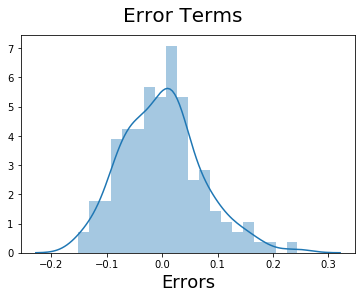

In [836]:

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)    

## MOdel 1 Residual analysis is done.It is normally distributed

In [838]:
num_vars = ['symboling', 'wheelbase', 'carlength', 'carheight', 'curbweight','enginesize','boreratio','stroke','compressionratio'
           ,'horsepower','peakrpm','citympg','highwaympg','price','carwidth']

cars_test[num_vars] = scaler.transform(cars_test[num_vars])

In [839]:
y_test = cars_test.pop('price')
X_test = cars_test

In [840]:
# Now let's use our model to make predictions.
X_train_new_three = X_train_new_three.drop(['const'], axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new_three.columns]

In [841]:
# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [842]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

y_pred = lm.predict(X_test_new)

r_squared = r2_score(y_test, y_pred)
r_squared


0.9004517106020885

In [843]:
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.005320680354402097
r_square_value : 0.9004517106020885


# R2 of train data is 0.891 and test data is 0.9004517106020885 very close.

Text(0, 0.5, 'price')

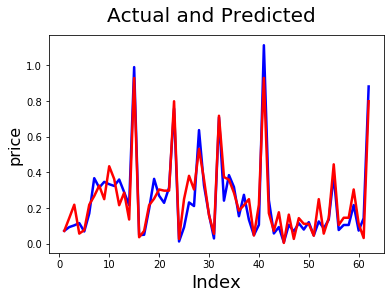

In [844]:
### Actual vs Predicted
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('price', fontsize=16)   

## Model Evaluation for model 1

Text(0, 0.5, 'y_pred')

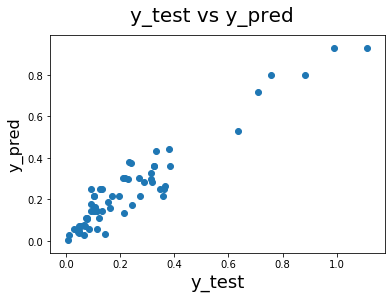

In [845]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)  

# The best fitted line is price = 0.253002 - (0.439993 * enginelocation)+(0.460619 * carwidth)+(0.727802 * enginesize)+(0.166434 * two)+(0.244664 * bmw)


## We will delete engine_size and verify the model

# This is because we can consider curbweight and we can check if it changes the pattern of removing variables. We will take data frame which has 'rotor' already removed.We will not take the initial training data frame it has 'rotor' already deleted

In [846]:
#dropping enginesize column
X_train_enginesize = X_train_new.drop(["enginesize"], axis = 1)
X_train_new_enginesize = sm.add_constant(X_train_enginesize)
lm = sm.OLS(y_train,X_train_new_enginesize).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     92.72
Date:                Sun, 31 May 2020   Prob (F-statistic):           8.40e-59
Time:                        22:22:30   Log-Likelihood:                 184.00
No. Observations:                 143   AIC:                            -340.0
Df Residuals:                     129   BIC:                            -298.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3136      0.094      3.

In [847]:
vif = pd.DataFrame()
vif['Features'] = X_train_new_enginesize.columns
vif['VIF'] = [variance_inflation_factor(X_train_new_enginesize.values, i) for i in range(X_train_new_enginesize.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,255.42
3,curbweight,7.61
2,carwidth,5.52
4,boreratio,2.66
7,six,2.14
12,porsche,2.09
1,enginelocation,1.74
6,eight,1.54
5,stroke,1.44
11,bmw,1.32


In [848]:
#deleting 'six' as it has highes P(T)0.349       and it makes it insignificant
X_train_six = X_train_new_enginesize.drop(["six"], axis = 1)
X_train_new_six = sm.add_constant(X_train_six)
lm = sm.OLS(y_train,X_train_new_six).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     100.5
Date:                Sun, 31 May 2020   Prob (F-statistic):           1.27e-59
Time:                        22:23:44   Log-Likelihood:                 183.51
No. Observations:                 143   AIC:                            -341.0
Df Residuals:                     130   BIC:                            -302.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3307      0.092      3.

In [849]:
#Calculate VIF
vif = pd.DataFrame()
vif['Features'] = X_train_new_six.columns
vif['VIF'] = [variance_inflation_factor(X_train_new_six.values, i) for i in range(X_train_new_six.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,245.82
3,curbweight,5.55
2,carwidth,5.33
4,boreratio,2.30
11,porsche,2.05
1,enginelocation,1.69
6,eight,1.46
5,stroke,1.43
8,twelve,1.16
12,volvo,1.13


In [850]:
# Dropping 'stroke' as it has highes P(T) 0.342      
X_train_stroke = X_train_new_six.drop(["stroke"], axis = 1)
X_train_new_stroke = sm.add_constant(X_train_stroke)
lm = sm.OLS(y_train,X_train_new_stroke).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     109.6
Date:                Sun, 31 May 2020   Prob (F-statistic):           1.85e-60
Time:                        22:24:37   Log-Likelihood:                 183.01
No. Observations:                 143   AIC:                            -342.0
Df Residuals:                     131   BIC:                            -306.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3457      0.091      3.

In [689]:
#VIF after deleting Stroke
vif = pd.DataFrame()
vif['Features'] = X_train_new_stroke.columns
vif['VIF'] = [variance_inflation_factor(X_train_new_stroke.values, i) for i in range(X_train_new_stroke.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,238.66
3,curbweight,5.36
2,carwidth,5.13
10,porsche,2.04
4,boreratio,1.93
1,enginelocation,1.69
5,eight,1.37
11,volvo,1.11
7,twelve,1.07
6,three,1.06


In [851]:
#Dropping volvo as it has P(T) as 0.139      
X_train_volvo = X_train_new_stroke.drop(["volvo"], axis = 1)
X_train_new_volvo = sm.add_constant(X_train_volvo)
lm = sm.OLS(y_train,X_train_new_volvo).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     119.2
Date:                Sun, 31 May 2020   Prob (F-statistic):           4.89e-61
Time:                        22:26:02   Log-Likelihood:                 181.82
No. Observations:                 143   AIC:                            -341.6
Df Residuals:                     132   BIC:                            -309.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3422      0.091      3.

In [852]:
#Calculating VIF after deleting volvo
vif = pd.DataFrame()
vif['Features'] = X_train_new_volvo.columns
vif['VIF'] = [variance_inflation_factor(X_train_new_volvo.values, i) for i in range(X_train_new_volvo.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,238.50
3,curbweight,5.36
2,carwidth,5.08
10,porsche,2.03
4,boreratio,1.89
1,enginelocation,1.69
5,eight,1.36
7,twelve,1.07
6,three,1.06
9,bmw,1.06


In [853]:
# Dropping 'two' as it has P(T) as 0.094      
X_train_two = X_train_new_volvo.drop(["two"], axis = 1)
X_train_new_two = sm.add_constant(X_train_two)
lm = sm.OLS(y_train,X_train_new_two).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     130.3
Date:                Sun, 31 May 2020   Prob (F-statistic):           1.69e-61
Time:                        22:28:01   Log-Likelihood:                 180.29
No. Observations:                 143   AIC:                            -340.6
Df Residuals:                     133   BIC:                            -310.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3445      0.092      3.

In [854]:
#caluculate VIF after dropping two
vif = pd.DataFrame()
vif['Features'] = X_train_new_two.columns
vif['VIF'] = [variance_inflation_factor(X_train_new_two.values, i) for i in range(X_train_new_two.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,238.45
3,curbweight,5.33
2,carwidth,5.07
9,porsche,2.03
4,boreratio,1.88
1,enginelocation,1.69
5,eight,1.36
7,twelve,1.07
6,three,1.06
8,bmw,1.06


In [855]:
#Dropping porsche as it has high P(T) 0.051      and medium VIF
X_train_porsche = X_train_new_two.drop(["porsche"], axis = 1)
X_train_new_porsche = sm.add_constant(X_train_porsche)
lm = sm.OLS(y_train,X_train_new_porsche).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     143.1
Date:                Sun, 31 May 2020   Prob (F-statistic):           9.18e-62
Time:                        22:29:06   Log-Likelihood:                 178.23
No. Observations:                 143   AIC:                            -338.5
Df Residuals:                     134   BIC:                            -311.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4476      0.076      5.

In [856]:
#Caluclating VIF after dropping Porsche
vif = pd.DataFrame()
vif['Features'] = X_train_new_porsche.columns
vif['VIF'] = [variance_inflation_factor(X_train_new_porsche.values, i) for i in range(X_train_new_porsche.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,161.19
3,curbweight,4.98
2,carwidth,4.90
4,boreratio,1.72
5,eight,1.19
7,twelve,1.07
6,three,1.06
8,bmw,1.06
1,enginelocation,1.05


In [857]:
# Dropping boreratio as it has high P(T) 0.095
X_train_bore = X_train_new_porsche.drop(["boreratio"], axis = 1)
X_train_new_bore = sm.add_constant(X_train_bore)
lm = sm.OLS(y_train,X_train_new_bore).fit() 

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     160.9
Date:                Sun, 31 May 2020   Prob (F-statistic):           2.80e-62
Time:                        22:30:15   Log-Likelihood:                 176.73
No. Observations:                 143   AIC:                            -337.5
Df Residuals:                     135   BIC:                            -313.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4136      0.074      5.

In [858]:
#Calculate VIF
vif = pd.DataFrame()
vif['Features'] = X_train_new_bore.columns
vif['VIF'] = [variance_inflation_factor(X_train_new_bore.values, i) for i in range(X_train_new_bore.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,149.87
2,carwidth,4.83
3,curbweight,4.60
4,eight,1.19
5,three,1.06
6,twelve,1.06
7,bmw,1.06
1,enginelocation,1.02


In [859]:
#Dropping 0.026       As it has significantly high P(T)
X_train_three = X_train_new_bore.drop(["three"], axis = 1)
X_train_new_three = sm.add_constant(X_train_three)
lm = sm.OLS(y_train,X_train_new_three).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     181.4
Date:                Sun, 31 May 2020   Prob (F-statistic):           2.40e-62
Time:                        22:31:28   Log-Likelihood:                 174.08
No. Observations:                 143   AIC:                            -334.2
Df Residuals:                     136   BIC:                            -313.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4204      0.075      5.

In [860]:
# VIF after dropping three
vif = pd.DataFrame()
vif['Features'] = X_train_new_three.columns
vif['VIF'] = [variance_inflation_factor(X_train_new_three.values, i) for i in range(X_train_new_three.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,149.63
2,carwidth,4.71
3,curbweight,4.59
4,eight,1.19
5,twelve,1.06
6,bmw,1.06
1,enginelocation,1.02


In [861]:
#Dropping carwidth as it has high VIF almost 5
X_train_width = X_train_new_three.drop(["carwidth"], axis = 1)
X_train_new_width = sm.add_constant(X_train_width)
lm = sm.OLS(y_train,X_train_new_width).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     192.9
Date:                Sun, 31 May 2020   Prob (F-statistic):           3.48e-60
Time:                        22:32:16   Log-Likelihood:                 166.00
No. Observations:                 143   AIC:                            -320.0
Df Residuals:                     137   BIC:                            -302.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4283      0.079      5.

In [862]:
#Now the values are looking very good but the constant is high which means the line passes through origin which is OKAY.
vif = pd.DataFrame()
vif['Features'] = X_train_new_width.columns
vif['VIF'] = [variance_inflation_factor(X_train_new_width.values, i) for i in range(X_train_new_width.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,149.53
2,curbweight,1.20
3,eight,1.10
4,twelve,1.06
5,bmw,1.04
1,enginelocation,1.00


## residual analysis

### residual analysis for second model

In [863]:
lm_2 = sm.OLS(y_train,X_train_new_width).fit() 
lm_2.params

const             0.428254
enginelocation   -0.539227
curbweight        0.753131
eight             0.280246
twelve            0.244894
bmw               0.279652
dtype: float64

In [864]:
y_train_price_2 = lm_2.predict(X_train_new_width)

Text(0.5, 0, 'Errors')

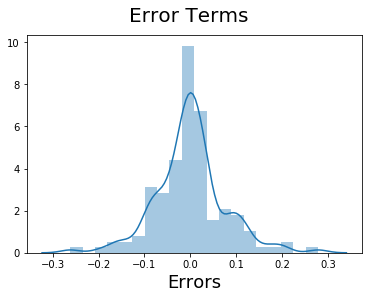

In [865]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price_2), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)       

### building a model with RFE only just by taking 5 columns and caluclating errors

In [866]:
# Running RFE with the output number of the variable equal to 15 .
#5 mean no manual calculation.
lr_automated = LinearRegression()
lr_automated.fit(X_train, y_train)

rfe_automated = RFE(lr_automated, 5)             # running RFE
rfe_automated = rfe_automated.fit(X_train, y_train)
columns_needed_automated = X_train.columns[rfe_automated.support_]
columns_needed_automated


Index(['enginelocation', 'carwidth', 'curbweight', 'enginesize', 'bmw'], dtype='object')

In [867]:
X_train_rfe_automated = X_train[columns_needed_automated]
X_train_rfe_automated = sm.add_constant(X_train_rfe_automated)
lm_automated = sm.OLS(y_train,X_train_rfe_automated).fit() 
print(lm_automated.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     214.0
Date:                Sun, 31 May 2020   Prob (F-statistic):           6.87e-63
Time:                        22:37:47   Log-Likelihood:                 172.52
No. Observations:                 143   AIC:                            -333.0
Df Residuals:                     137   BIC:                            -315.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2960      0.077      3.

In [868]:
y_train_price_automated = lm_automated.predict(X_train_rfe_automated)

Text(0.5, 0, 'Errors')

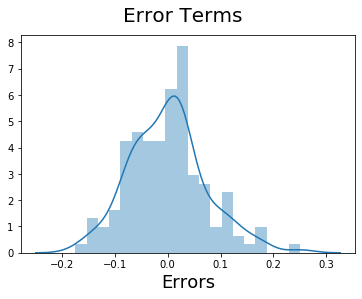

In [869]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price_automated), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

## As we can see It is similar to first model with enginesize

## Making Predictions for model 2 removing enginesize

In [870]:
X_train_new_width.columns

Index(['const', 'enginelocation', 'curbweight', 'eight', 'twelve', 'bmw'], dtype='object')

In [871]:
# Now let's use our model to make predictions.
X_train_new_width = X_train_new_width.drop(['const'], axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new_width.columns]

In [872]:
# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [873]:
X_test_new.columns

Index(['const', 'enginelocation', 'curbweight', 'eight', 'twelve', 'bmw'], dtype='object')

In [874]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [875]:
y_pred = lm_2.predict(X_test_new)

In [715]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.8945932909438749

# The training model has R2 of 87.6 and test data has R2 of  0.8945932909438749.

In [877]:

mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [878]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.005633802544364652
r_square_value : 0.8945932909438749


Text(0, 0.5, 'price')

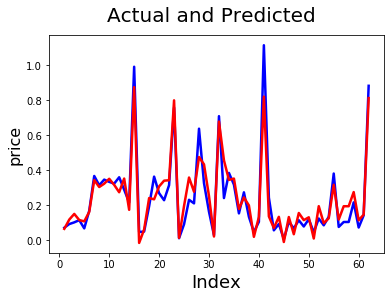

In [880]:
### Actual vs Predicted
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('price', fontsize=16)                               # Y-label

## Model Evaluation for Model 2 Removing Enginesize

Text(0, 0.5, 'y_pred')

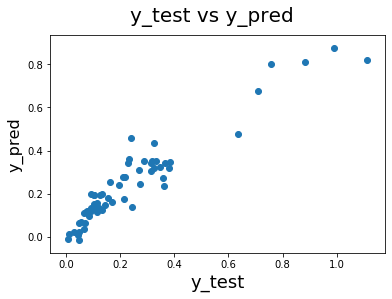

In [881]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

## Both the models are quite simlar with r2 of training and test data The error plots are normalized and scatter plots are liniear with some values are scattered at the high end on the line

## We can see that the actual and predicted plots are overlapping.

# I would choose Model 2 as errors are more concentrated around 0 and scatter plot is more concentrated.